### VUONG Christophe                                                                     

<h1><center>RIO208 - TP Dimensionnement OFDMA</center></h1>
<center> 29 mai 2019 - 30 mai 2019 </center> 

# Sommaire
### 1. [Modèle](#paragraph1)
### 2. [Implémentation du modèle](#paragraph2)
### 3. [Probabilité d'outage](#paragraph3)
### 4. [Introduction du fading](#paragraph4)
### 5. [Conclusion](#paragraph5)
### 6. [Annexe](#paragraph6)
<br/><br/>

## 1. Modèle <a name="paragraph1"></a>



<br/><br/>
## 2. Implémentation du modèle <a name="paragraph2"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# cellule avec un unique point d'accès

def proc_poisson_circ(lam,R,Plot=True):
    n = np.random.poisson(lam)
    theta = 2 * np.pi * np.random.rand(n)
    random = np.random.rand(n)
    r = [R * np.sqrt(random[i]) for i in range(n)]
    x = np.array([r[i] * np.cos(theta[i]) for i in range(n)])[:, np.newaxis]
    y = np.array([r[i] * np.sin(theta[i]) for i in range(n)])[:, np.newaxis]
    if Plot:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='polar')
        ax.scatter(theta, r)
        plt.show()
    Z = np.concatenate((x, y), axis=1)
    return (Z, r, theta)

In [3]:
R = 320
lam = 0.01 * np.pi * R**2

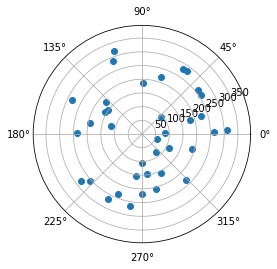

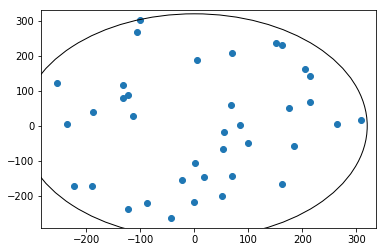

In [4]:
p = 0.01
users = proc_poisson_circ(p*lam,R)
circle= plt.Circle((0,0),R, fill=False)
fig, ax = plt.subplots() 
ax.add_artist(circle)
ax.scatter(users[0][:,0], users[0][:,1])
plt.show()

In [5]:
C = 162
w = 180
K = 10**6
SNRmin = 0.1
qmax = np.ceil(C / (w * np.log2(1 + SNRmin)))
qmax

7.0

<br/><br/>
## 3. Probabilité d'outage

**4)** Pour déterminer $q(x)$, il suffit de déterminer la distance des utilisateurs déterminée précédemment au point $(0,0)$ de la station de base.



In [5]:
def F_S(S, C, w, K, gamma, SNRmin, lam=0.01 * np.pi * 320**2, R=320):
    users = proc_poisson_circ(lam,R,Plot=False)
    r = users[1]
    n = len(r)
    F = 0
    flag = 0
    for i in range(n):
        dist = r[i]
        F += np.ceil(C / (w * np.log2(1 + max(K / (dist**gamma), SNRmin)))) 
    if F >= S:
        flag = 1
    return flag

def P_S(S, C=162, w=180, K=10**6, gamma=2.8, SNRmin=0.1, n_simul=10000):
    p = 0
    for j in range(n_simul):
        p += F_S(S, C, w, K, gamma, SNRmin)
    return p / n_simul    
    

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


TypeError: title() missing 1 required positional argument: 's'

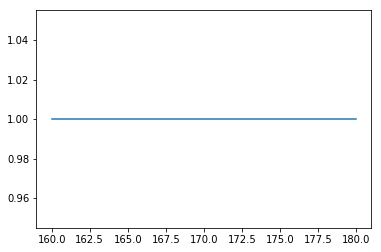

In [6]:
n_plot = 20
S = np.linspace(160, 180, n_plot)
P = np.zeros(n_plot)
for i in range(n_plot):
    P[i] = P_S(S[i])
    
print(P)

plt.plot(S,P)
plt.title("s")

**5)** Ici, si on ajoute un utilisateur, on a une variation donnée par $q$, qui donne au maximum $q_{max} = 7$ d'après la 3.

Donc $\beta = 7$, et donc $\alpha = \beta^2 \pi R^2$